In [1]:
import pandas as pd
import sys
import os
import time

In [2]:
df = pd.read_csv('Inputs_Outputs.csv') # Read solution set CSV with two columns, Input and Expected Output

In [3]:
countTest = 0 # Counter corresponds to row index
for i in df['Input']: # Iterate through all possible input values from solution set
    startTime = time.perf_counter() # Record time prior to script execution
    realOutput = int(str(os.popen('python numSquared.py ' + str(i)).read()).replace('\n','')) # Execute script using os.popen to invoke python script via command line and input current argument (i)
    endTime = time.perf_counter() # Record time upon completion of script
    df.at[countTest,'Actual Output'] = realOutput # Write script result to csv
    df.loc[countTest,'Execution Time(s)'] = (endTime - startTime) # Write execution time to new column
    countTest+=1 # Count increment to move to next input index

In [4]:
countCompare = 0 # Seperate counter to track index for test comparison
for i in df['Expected Output']: # Iterate through expected output values while comparing against actual output
    if i == df.at[countCompare,'Actual Output']:
        df.loc[countCompare,'Test Outcome'] = 'SUCCESS' # If both are the same, write accordingly to csv, vice versa if they're different
        countCompare+=1 # Increment to next index
    else:
        df.loc[countCompare,'Test Outcome'] = 'FAIL'
        countCompare+=1

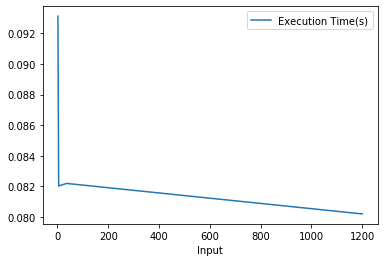

In [6]:
df.plot(x='Input',y='Execution Time(s)') # Generate graph for visual trend analysis

In [7]:
df.to_csv('Test_Results.csv') # Generate report